# Object Detection using Yolov3

### Object Detection can be defined as the task of object classification and localization.Object Detection plays an important role in many Deep Learning projects and IoT Applications such as we need object detection for Autonomous Vehicles, we need it for security camera surveillance, and even for applications used by us for generating PDFs nowadays uses Object Detection for detecting documents.In short, Object Detection has a wide range of appliactions.

## Importing necessary libraries

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from tensorflow import keras

## Importing the Yolov3 pretrained model and some other necessary files to our workspace

In [2]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/Yolo_data.zip"
!unzip -o Yolo_data.zip 
!rm Yolo_data.zip

--2020-10-14 15:08:48--  https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/Yolo_data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.120
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462457774 (441M) [application/x-zip-compressed]
Saving to: ‘Yolo_data.zip’

Yolo_data.zip       100%[===================>] 441.03M  81.7MB/s    in 5.4s    

2020-10-14 15:08:53 (80.9 MB/s) - ‘Yolo_data.zip’ saved [462457774/462457774]

Archive:  Yolo_data.zip
  inflating: yolov3.weights          
  inflating: images3.jpg             
  inflating: images1.jpg             
   creating: cfg/
  inflating: cfg/yolov3.cfg          
  inflating: coco.names              
  inflating: model.h5                
  inflating: test.jpg                


## Loading the pretrained Yolov3 Model
#### Since Yolov3 model has been trained on the MS COCO dataset for thousands of epochs and hours of training, so there is no need for explicit training rather we can just use the pretrained model and its weights provided by [Yolo](https://pjreddie.com/darknet/yolo/).

In [3]:
model = keras.models.load_model('model.h5')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
bnorm_0 (BatchNormalization)    (None, None, None, 3 128         conv_0[0][0]                     
__________________________________________________________________________________________________
leaky_0 (LeakyReLU)             (None, None, None, 3 0           bnorm_0[0][0]                    
_______________________________________________________________________________________

## Loading the model and its configuration for our object detection.

In [5]:
# Loading Yolov3
net = cv2.dnn.readNet("weights/yolov3.weights", "cfg/yolov3.cfg")
classes = []
# Reading the class names which we are focussed on predicting
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
# Defining font and bounding box colour
colors = np.random.uniform(0, 255, size=(len(classes), 3))
font = cv2.FONT_HERSHEY_PLAIN

## Visualizing the results

Detected object in Image


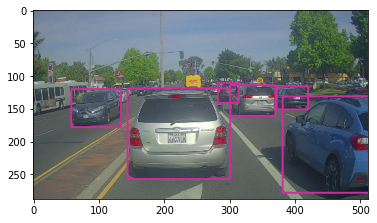

In [7]:
# Loading image
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
frame = cv2.resize(img, None, fx=0.4, fy=0.4)

height, width, channels = frame.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing boxes on the images whose confidence of predicting an object is higher than a particular threshold
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.2:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.8, 0.3)

# Building the boxes on top of the image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

print("Detected object in Image")
plt.imshow(frame)
   

Detected object in Image


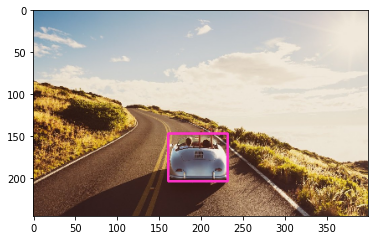

In [8]:
# Loading image
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
frame = cv2.resize(img, None, fx=0.4, fy=0.4)

height, width, channels = frame.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing boxes on the images whose confidence of predicting an object is higher than a particular threshold
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.2:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.8, 0.3)

# Building the boxes on top of the image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

print("Detected object in Image")
plt.imshow(frame)

Detected object in Image


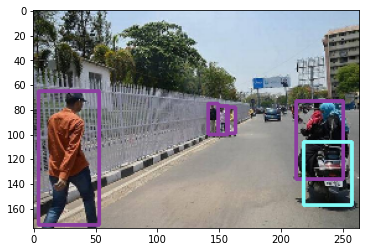

In [9]:
# Loading image
img = cv2.imread("test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
frame = cv2.resize(img, None, fx=0.4, fy=0.4)

height, width, channels = frame.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing boxes on the images whose confidence of predicting an object is higher than a particular threshold
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.2:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.8, 0.3)

# Building the boxes on top of the image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

print("Detected object in Image")
plt.imshow(frame)

## Compiling the model using DeepC Compiler

In [ ]:
!deepCC model.h5

reading [keras model] from 'model.h5'
Saved 'model.onnx'
reading onnx model from file  model.onnx
Model info:
  ir_vesion :  3 
  doc       : 
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): graph-node conv_1's attribute auto_pad has no meaningful data.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): graph-node conv_5's attribute auto_pad has no meaningful data.
WARN (ONNX): spatial is not a valid graph-node attribute.
             operator BatchNormalization will be added without this attribute.
WARN (ONNX): spatial